In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
sns.set()

In [2]:
restaurantdf=pd.read_csv('yelp_dataset/restaurantCleanCategories.csv',encoding = "utf-8-sig")

In [3]:
#split the date to be separate items in an array isntead of a string of items
restauranttest=restaurantdf.date.str.split(', ',n=-1,expand=False)
restaurantdf.insert(1,'checkin',restauranttest,True)
del restaurantdf['date']
restaurantdf.head(10)

,business_id,checkin,name,city,state,Afghan,African,American (New),American (Traditional),Arabian,...,Tempura,Tonkatsu,Oaxacan,Guamanian,Iberian,Bulgarian,Soba,Hainan,Senegalese,Churros
0,QXAEGFB4oINsVuTFxEYKFQ,"[2010-07-05 16:56:31, 2010-12-21 20:30:01, 201...",Emerald Chinese Restaurant,Mississauga,ON,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,gnKjwL_1w79qoiV3IC_xQQ,"[2010-11-13 01:00:36, 2010-12-19 00:49:15, 201...",Musashi Japanese Restaurant,Charlotte,NC,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1Dfx3zM-rW4n-31KeC8sJg,"[2010-07-20 22:03:12, 2010-07-26 19:51:14, 201...",Taco Bell,Phoenix,AZ,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,fweCYi8FmbJXHCqLnwuk8w,"[2010-09-26 23:14:40, 2010-09-27 01:36:58, 201...",Marco's Pizza,Mentor-on-the-Lake,OH,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PZ-LZzSlhSe9utkQYU8pFg,"[2010-03-05 03:54:37, 2010-07-15 03:43:42, 201...",Carluccio's Tivoli Gardens,Las Vegas,NV,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1RHY4K3BD22FK7Cfftn8Mg,"[2017-10-08 16:47:41, 2018-01-03 13:53:39, 201...",Marathon Diner,Pittsburgh,PA,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,tstimHoMcYbkSC4eBA1wEg,"[2010-06-26 20:40:58, 2010-10-31 19:06:32, 201...",Maria's Mexican Restaurant & Bakery,Las Vegas,NV,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,NDuUMJfrWk52RA-H-OtrpA,"[2013-12-01 00:12:10, 2013-12-03 23:01:24, 201...",Bolt Fresh Bar,Toronto,ON,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,SP_YXIEwkFPPl_9anCYmpQ,"[2013-07-20 22:24:11, 2013-08-01 18:34:15, 201...",The Steady Cafe & Bar,Toronto,ON,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,BvYU3jvGd0TJ7IyZdfiN2Q,"[2010-08-08 17:57:52, 2010-10-06 12:18:22]",Manzetti's Tavern,Charlotte,NC,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#CSV with just business ID and category dummy variable information. 
categories=pd.read_csv('yelp_dataset/categories.csv',encoding = "ISO-8859-1")
categories.describe()

,Afghan,African,American (New),American (Traditional),Arabian,Argentine,Armenian,Asian Fusion,Australian,Austrian,...,Tempura,Tonkatsu,Oaxacan,Guamanian,Iberian,Bulgarian,Soba,Hainan,Senegalese,Churros
count,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,...,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000,57402.000000
mean,0.002178,0.002404,0.083272,0.121529,0.001132,0.000784,0.000157,0.033222,0.000174,0.000139,...,0.000017,0.000017,0.000017,0.000035,0.000087,0.000017,0.000017,0.000017,0.000017,0.000017
std,0.046615,0.048973,0.276296,0.326744,0.033632,0.027988,0.012521,0.179217,0.013198,0.011805,...,0.004174,0.004174,0.004174,0.005903,0.009333,0.004174,0.004174,0.004174,0.004174,0.004174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
list(categories.columns)

['business_id',
 'Afghan',
 'African',
 'American (New)',
 'American (Traditional)',
 'Arabian',
 'Argentine',
 'Armenian',
 'Asian Fusion',
 'Australian',
 'Austrian',
 'Bangladeshi',
 'Basque',
 'Belgian',
 'Brazilian',
 'British',
 'Cajun/Creole',
 'Cambodian',
 'Canadian (New)',
 'Caribbean',
 'Chinese',
 'Creperies',
 'Cuban',
 'Dim Sum',
 'Donairs',
 'Ethiopian',
 'Ethnic Food',
 'Falafel',
 'Filipino',
 'French',
 'Gelato',
 'German',
 'Greek',
 'Hakka',
 'Hawaiian',
 'Himalayan/Nepalese',
 'Honduran',
 'Hong Kong Style Cafe',
 'Hungarian',
 'Indian',
 'Irish',
 'Irish Pub',
 'Italian',
 'Izakaya',
 'Japanese',
 'Kebab',
 'Korean',
 'Laotian',
 'Latin American',
 'Macarons',
 'Malaysian',
 'Mexican',
 'Middle Eastern',
 'Mongolian',
 'Moroccan',
 'New Mexican Cuisine',
 'Nicaraguan',
 'Pakistani',
 'Pan Asian',
 'Persian/Iranian',
 'Peruvian',
 'Poke',
 'Polish',
 'Portuguese',
 'Poutineries',
 'Puerto Rican',
 'Ramen',
 'Restaurants',
 'Russian',
 'Salvadoran',
 'Scottish',
 'S

In [6]:
#get means for all the categories to get an average
cat_mean=np.mean(categories.drop(columns=['business_id','Restaurants']))
cat_mean.head()

Afghan                    0.002178
African                   0.002404
American (New)            0.083272
American (Traditional)    0.121529
Arabian                   0.001132
dtype: float64

In [7]:
cat_mean_sorted=cat_mean.sort_values(ascending=False)

In [8]:
#xlabels=[]
#for categories in cat_mean_sorted.index:
#    xlabels.append(categories)

Text(0, 0.5, 'percentage')

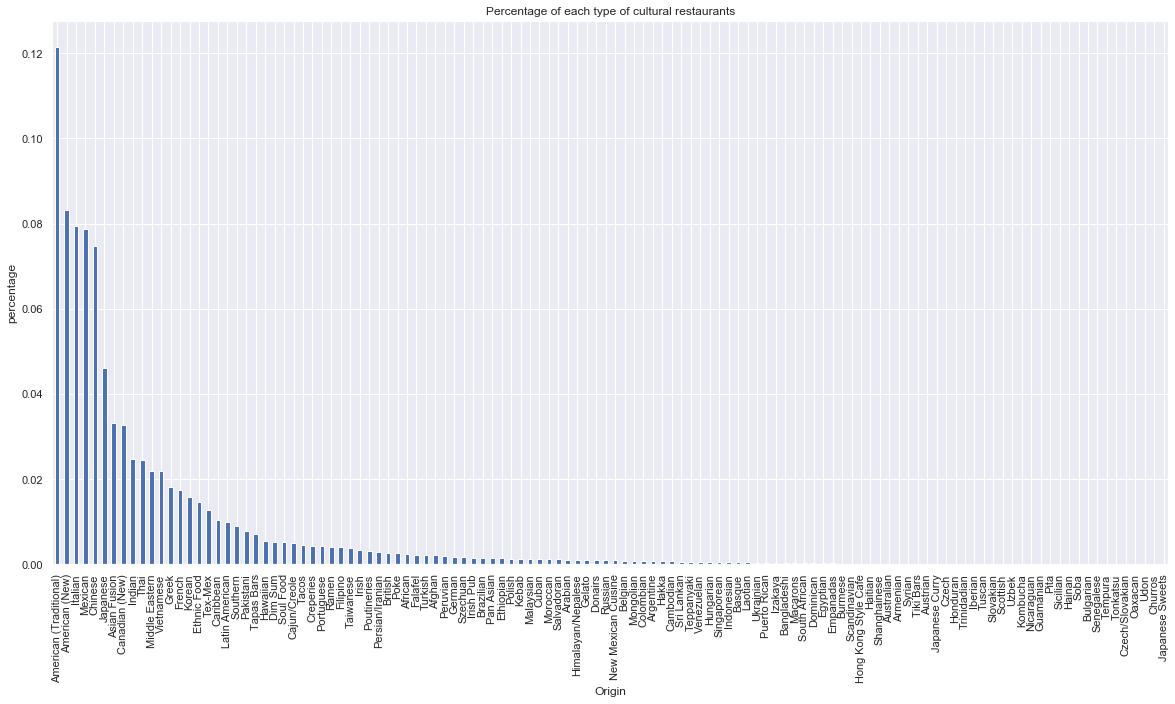

In [9]:
_=cat_mean_sorted.plot(kind='bar',
                figsize=(20, 10),
                title='Percentage of each type of cultural restaurants')
#_.set_xticklabels(xlabels,rotation=45)
_.set_xlabel("Origin")
_.set_ylabel("percentage")

From the chart above American food is the highest percentage which should be no surprise as these are restaurants mainly in Canada and America. Not all restaurants are tagged which is fine, many restaurants such as a deli would not be catering a specific cultural designation. Though Japanese is a high drop off after chinese, it is split into 9 different categories.

Text(0, 0.5, 'Count')

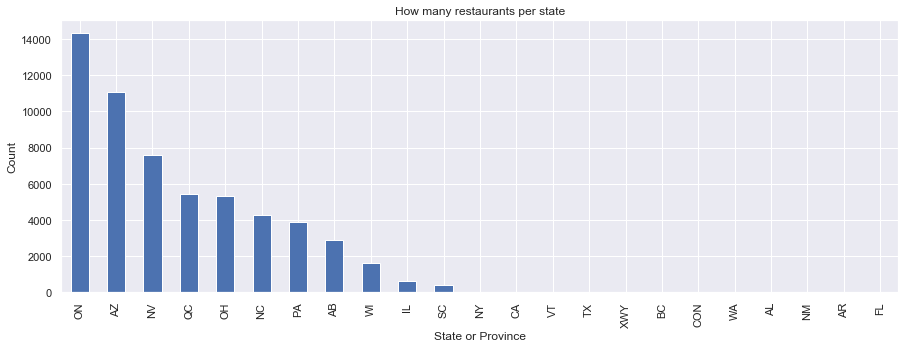

In [15]:
_=restaurantdf.state.value_counts().plot(kind='bar',
                figsize=(15, 5),
                title='How many restaurants per state')
_.set_xlabel("State or Province")
_.set_ylabel("Count")

In [11]:
#What? How is it that I am only getting this few states? Mostly from Ontario, Arizona, and Nevada it looks like
restaurantdf.state.value_counts()
#after some digging, it looks like it's inherent to the dataset that was provided by yelp which makes sense as Yelp probably wouldn't want to provide all their data publicly

ON     14320
AZ     11079
NV      7581
QC      5420
OH      5323
NC      4257
PA      3861
AB      2908
WI      1620
IL       635
SC       376
NY        11
CA         1
VT         1
TX         1
XWY        1
BC         1
CON        1
WA         1
AL         1
NM         1
AR         1
FL         1
Name: state, dtype: int64

In [18]:
restaurantdf.loc[restaurantdf['state']=='AZ'].city.value_counts()

Phoenix                 3855
Scottsdale              1512
Mesa                    1133
Tempe                    997
Chandler                 834
Glendale                 702
Gilbert                  566
Peoria                   361
Surprise                 223
Goodyear                 177
Avondale                 171
Cave Creek                88
Fountain Hills            82
Litchfield Park           49
Sun City                  46
Tolleson                  35
Laveen                    33
Carefree                  30
Paradise Valley           26
El Mirage                 25
Queen Creek               20
Buckeye                   14
Sun City West             14
Sun Lakes                 11
Youngtown                  9
Guadalupe                  7
Anthem                     6
Higley                     5
Apache Junction            5
Ahwatukee                  5
Laveen Village             5
Fort McDowell              4
PHOENIX                    4
Fort Mcdowell              2
Pheonix       

In [12]:
#as one of the largest cities, drilling into phoenix
restaurantdf.loc[restaurantdf['city']=='Phoenix']

,business_id,checkin,name,city,state,Afghan,African,American (New),American (Traditional),Arabian,...,Tempura,Tonkatsu,Oaxacan,Guamanian,Iberian,Bulgarian,Soba,Hainan,Senegalese,Churros
2,1Dfx3zM-rW4n-31KeC8sJg,"[2010-07-20 22:03:12, 2010-07-26 19:51:14, 201...",Taco Bell,Phoenix,AZ,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,44YFU284Z3KDEy25QyVoUw,"[2010-04-06 03:28:25, 2010-05-01 03:26:38, 201...",Nee House Chinese Restaurant,Phoenix,AZ,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,ysfeDcLAYk_MVzfBmyiSTg,"[2013-06-21 19:33:23, 2014-03-12 22:42:46, 201...",Vals Getaway DES Cafeteria,Phoenix,AZ,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,Rs8Wi4OEjeOX7LVlzsXDOA,"[2017-03-04 01:06:24, 2017-03-12 22:16:15, 201...",Sushi Mocorito,Phoenix,AZ,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,dUffgo9Lh_Vk9TLuFR5ywg,"[2010-04-05 01:34:19, 2010-04-09 21:35:36, 201...",Oregano's Pizza Bistro,Phoenix,AZ,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57295,KJJwE2gZ1ByGN55cIHxdkA,"[2018-09-29 21:32:54, 2018-10-08 00:15:34, 201...",Yogis Grill,Phoenix,AZ,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57323,CUn59grUqyROxhSyfjjhHw,"[2011-02-14 19:49:05, 2011-12-10 02:45:12, 201...",Filiberto's Mexican Food,Phoenix,AZ,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57347,3xI0ToitrAJkrUSH4gbmCA,"[2010-11-07 19:14:44, 2011-10-08 20:11:24, 201...",Subway,Phoenix,AZ,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57353,cILk7PnJBxNsMmGhQU2cyA,"[2014-03-30 15:03:14, 2014-04-01 19:39:41, 201...",Lola's,Phoenix,AZ,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Information provided by the US Census bureau (https://www.census.gov/quickfacts/fact/table/phoenixcityarizona,AZ/PST045219)
AZdf=pd.read_csv('yelp_dataset/AZcensus.csv',encoding = "utf-8-sig")

In [17]:
AZdf

,Fact,"Phoenix city, Arizona",Arizona
0,"Population estimates, July 1, 2019, (V2019)",NaN,"7,278,717"
1,"Population estimates, July 1, 2018, (V2018)","1,660,272","7,171,646"
2,"Population estimates base, April 1, 2010, (V2...",NaN,"6,392,288"
3,"Population estimates base, April 1, 2010, (V2...","1,446,914","6,392,288"
4,"Population, percent change - April 1, 2010 (es...",NaN,13.90%
5,"Population, percent change - April 1, 2010 (es...",14.70%,12.20%
6,"Population, Census, April 1, 2010","1,445,632","6,392,017"
7,"Persons under 5 years, percent",7.40%,6.10%
8,"Persons under 18 years, percent",26.50%,22.90%
9,"Persons 65 years and over, percent",10.30%,17.50%


inputs -
categories: dummies
businessID: unique values
cities: categorical
state:categorical
checkin: array of datetime


Things I am looking for ultimately:

#scatter plot to describe cities with total restaurants on X and the percentage of restaurants with a foreign origin on the Y with each point being a city
I could do a regression line through the scatterplot to show how correlated restaurant diversity is to the number of overall restaurants.number of restaurants is effectively just a proxy for how urbanized and big a city is, so what this data means would be how much foreign culture as a percentage is accepted the bigger or smaller a city is.

x= # of restaurants
y= percentage of foreign restaurants
.=city
|         /.  .
|      ./
| .  /.   .
| ./ .
|/._____________


#have a drill in plot to a state and city
#take the census data, map certain categories to racial origin and have a bar chart of what percentage of the restaurant origins represented are over or under the percentage
What this would represent is how much more or less represented a culture is compared to the population, high values would mean restaurants of that category have high influence. Unfortunately, US census only asks for a few ethnic categories(White, Black or African American, American Indian and Alaska Native, Asian, Native Hawaiian and Other Pacific Islander, and Hispanic or Latino) which are very broad. This can only get a region's influence on the city/state instead of more specific, but it would be insightful. Would need to bucket yelp categories into census ethnic origin.

x=different racial origin (e.g. Asian, hispanic)
y=diff between percentage of foreign restaurants and the racial origin 
|
|
|   __
|   | |
|___|_|_______
|        |_|
|        
|
|

#for the city,